In [207]:
import matplotlib as mpl
import numpy as np
import scipy 
import pickle
import pylab as plt
import copy
%matplotlib inline

In [208]:
f=open("./MCEqFluxMeshes.pkl","rb")
EBins, cosas, bs, FluxMeshes= pickle.load(f)
f.close()

f=open("./LinInterps.pkl","rb")
LinInterps=pickle.load(f)
f.close()

In [209]:
eps=0.01
survivalfractions=[]
correctedmeshes=[]
for ei in range(0,len(EBins)-2):
    mesh=copy.copy(FluxMeshes[ei])
    survmesh=np.zeros_like(mesh)
    for ica in range(len(cosas)):
        for ib in range(len(bs)):
            surv=LinInterps[EBins[ei]](cosas[ica]+eps,bs[ib])
            survmesh[ica,ib]=surv
            mesh[ica,ib]=mesh[ica,ib]*surv
    correctedmeshes.append(mesh)
    survivalfractions.append(survmesh)


Text(0, 0.5, '$\\beta$')

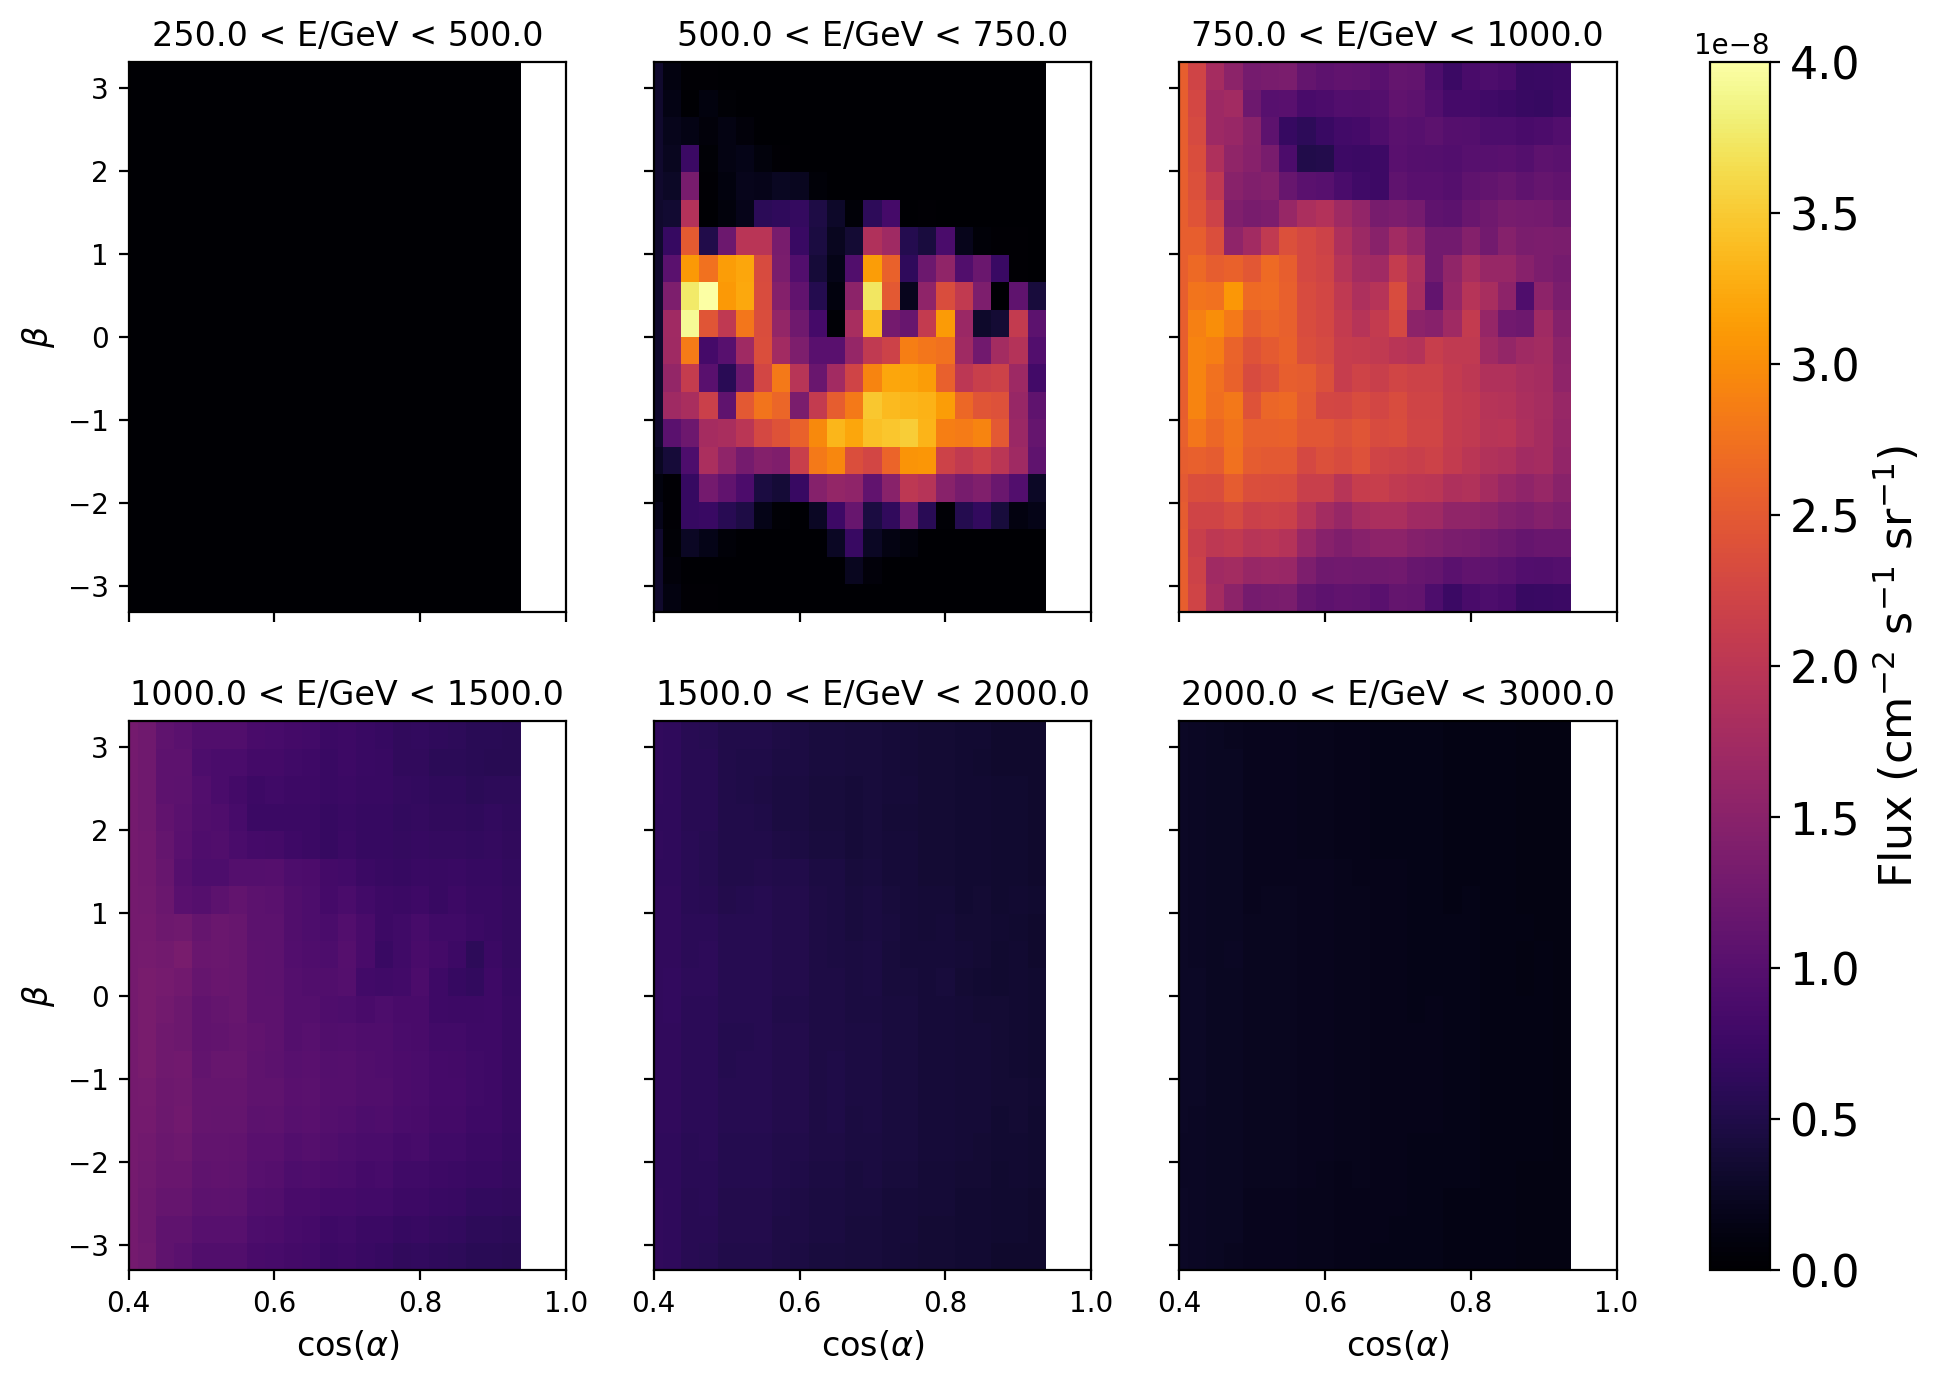

In [210]:
startn=1
fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(12,8),dpi=200, sharex=True, sharey=True)
for iax in range(0,len(axes.flat)):
    ax=axes.flatten()[iax]
    im=ax.pcolormesh(cosas,bs,np.transpose(correctedmeshes[iax+startn]),cmap='inferno',shading='auto',vmin=0,vmax=4e-8)
    ax.set_title(str(EBins[iax+startn])+ " < E/GeV < " + str(EBins[iax+startn+1]))
    ax.set_xlim(0.4,1)
cbar=fig.colorbar(im, ax=axes.ravel().tolist(),label='Flux (cm$^{-2}$ s$^{-1}$ sr$^{-1}$)')
cbar.set_label('Flux (cm$^{-2}$ s$^{-1}$ sr$^{-1}$)',fontsize=16)
cbar.ax.tick_params(labelsize=16)
totalflux=np.zeros_like(correctedmeshes[0])

axes[1,0].set_xlabel(r"cos($\alpha$)",fontsize=12)
axes[1,1].set_xlabel(r"cos($\alpha$)",fontsize=12)
axes[1,2].set_xlabel(r"cos($\alpha$)",fontsize=12)

axes[1,0].set_ylabel(r"$\beta$",fontsize=12)
axes[0,0].set_ylabel(r"$\beta$",fontsize=12)



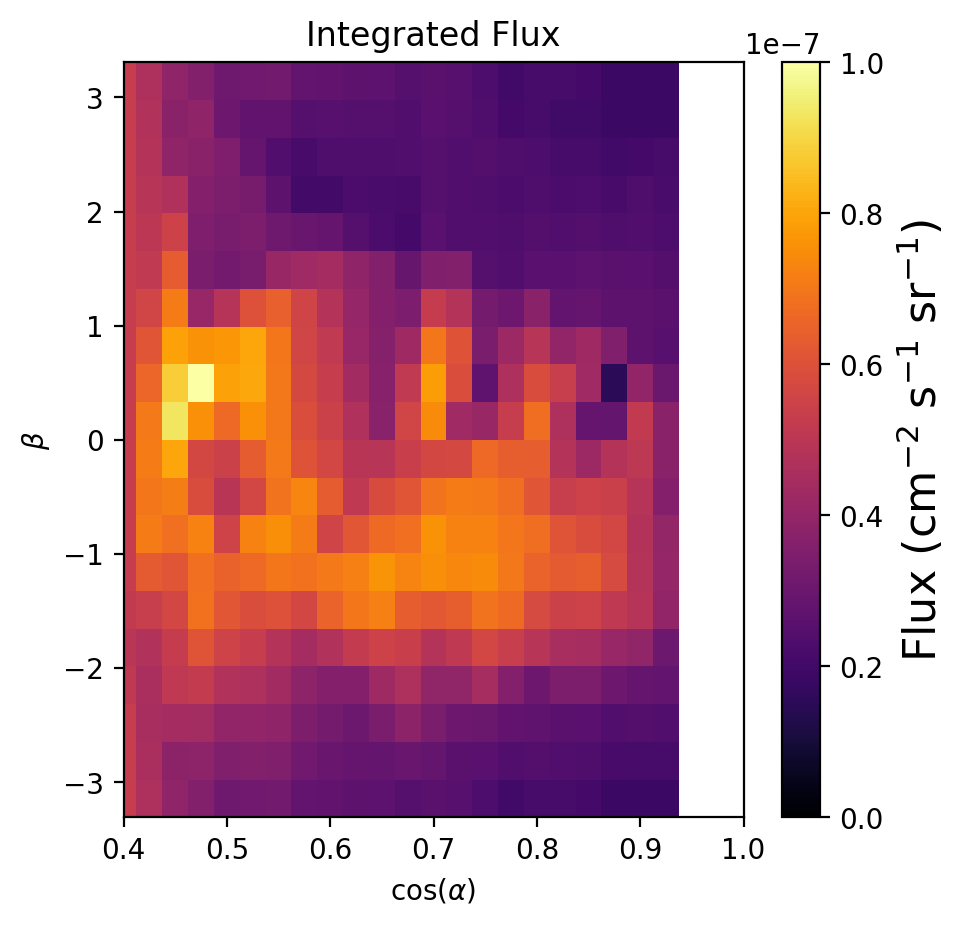

In [220]:
plt.figure(figsize=(5,5),dpi=200)
totalflux=0
for m in correctedmeshes:
    totalflux+=m
im=plt.pcolormesh(cosas,bs,np.transpose(totalflux),cmap='inferno',shading='auto',vmin=0,vmax=1e-7)
ax.set_title("Integrated")

plt.xlabel(r"cos($\alpha$)")
plt.ylabel(r"$\beta$")
plt.xlim(0.4,1)
plt.title("Integrated Flux")
cbar=plt.colorbar()
cbar.set_label('Flux (cm$^{-2}$ s$^{-1}$ sr$^{-1}$)',fontsize=16)



(0.0, 1.3e-06)

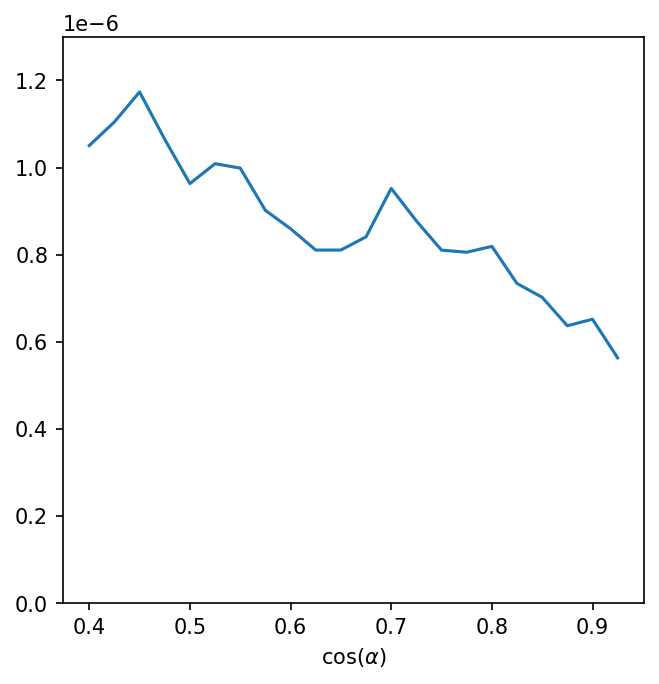

In [223]:
plt.figure(figsize=(5,5),dpi=150)
plt.plot(cosas,[sum(t) for t in totalflux])
plt.xlabel(r"cos($\alpha$)")
plt.ylim(0,1.3e-6)

Text(0.5, 0, '$\\beta$')

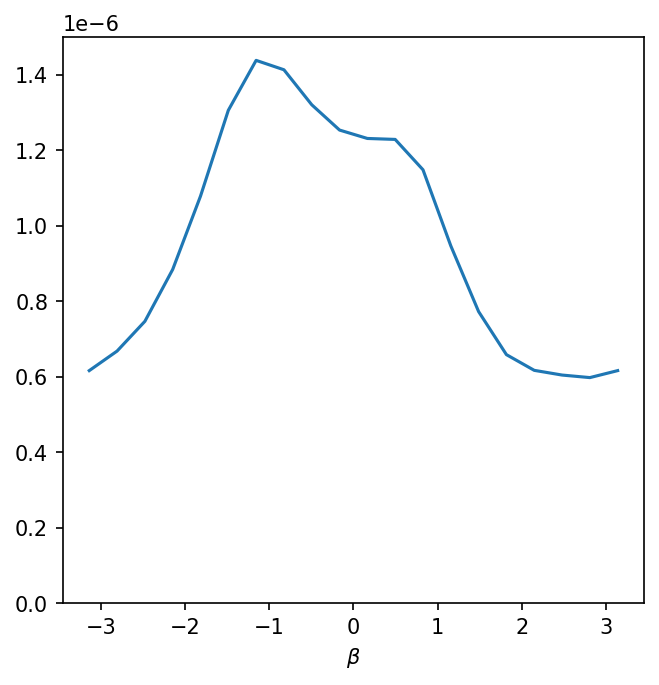

In [224]:
plt.figure(figsize=(5,5),dpi=150)

plt.ylim(0,1.5e-6)
plt.plot(bs,sum(totalflux))
plt.xlabel(r"$\beta$")
#plt.ylim(0,1.5e-6)

Text(0, 0.5, '$\\beta$')

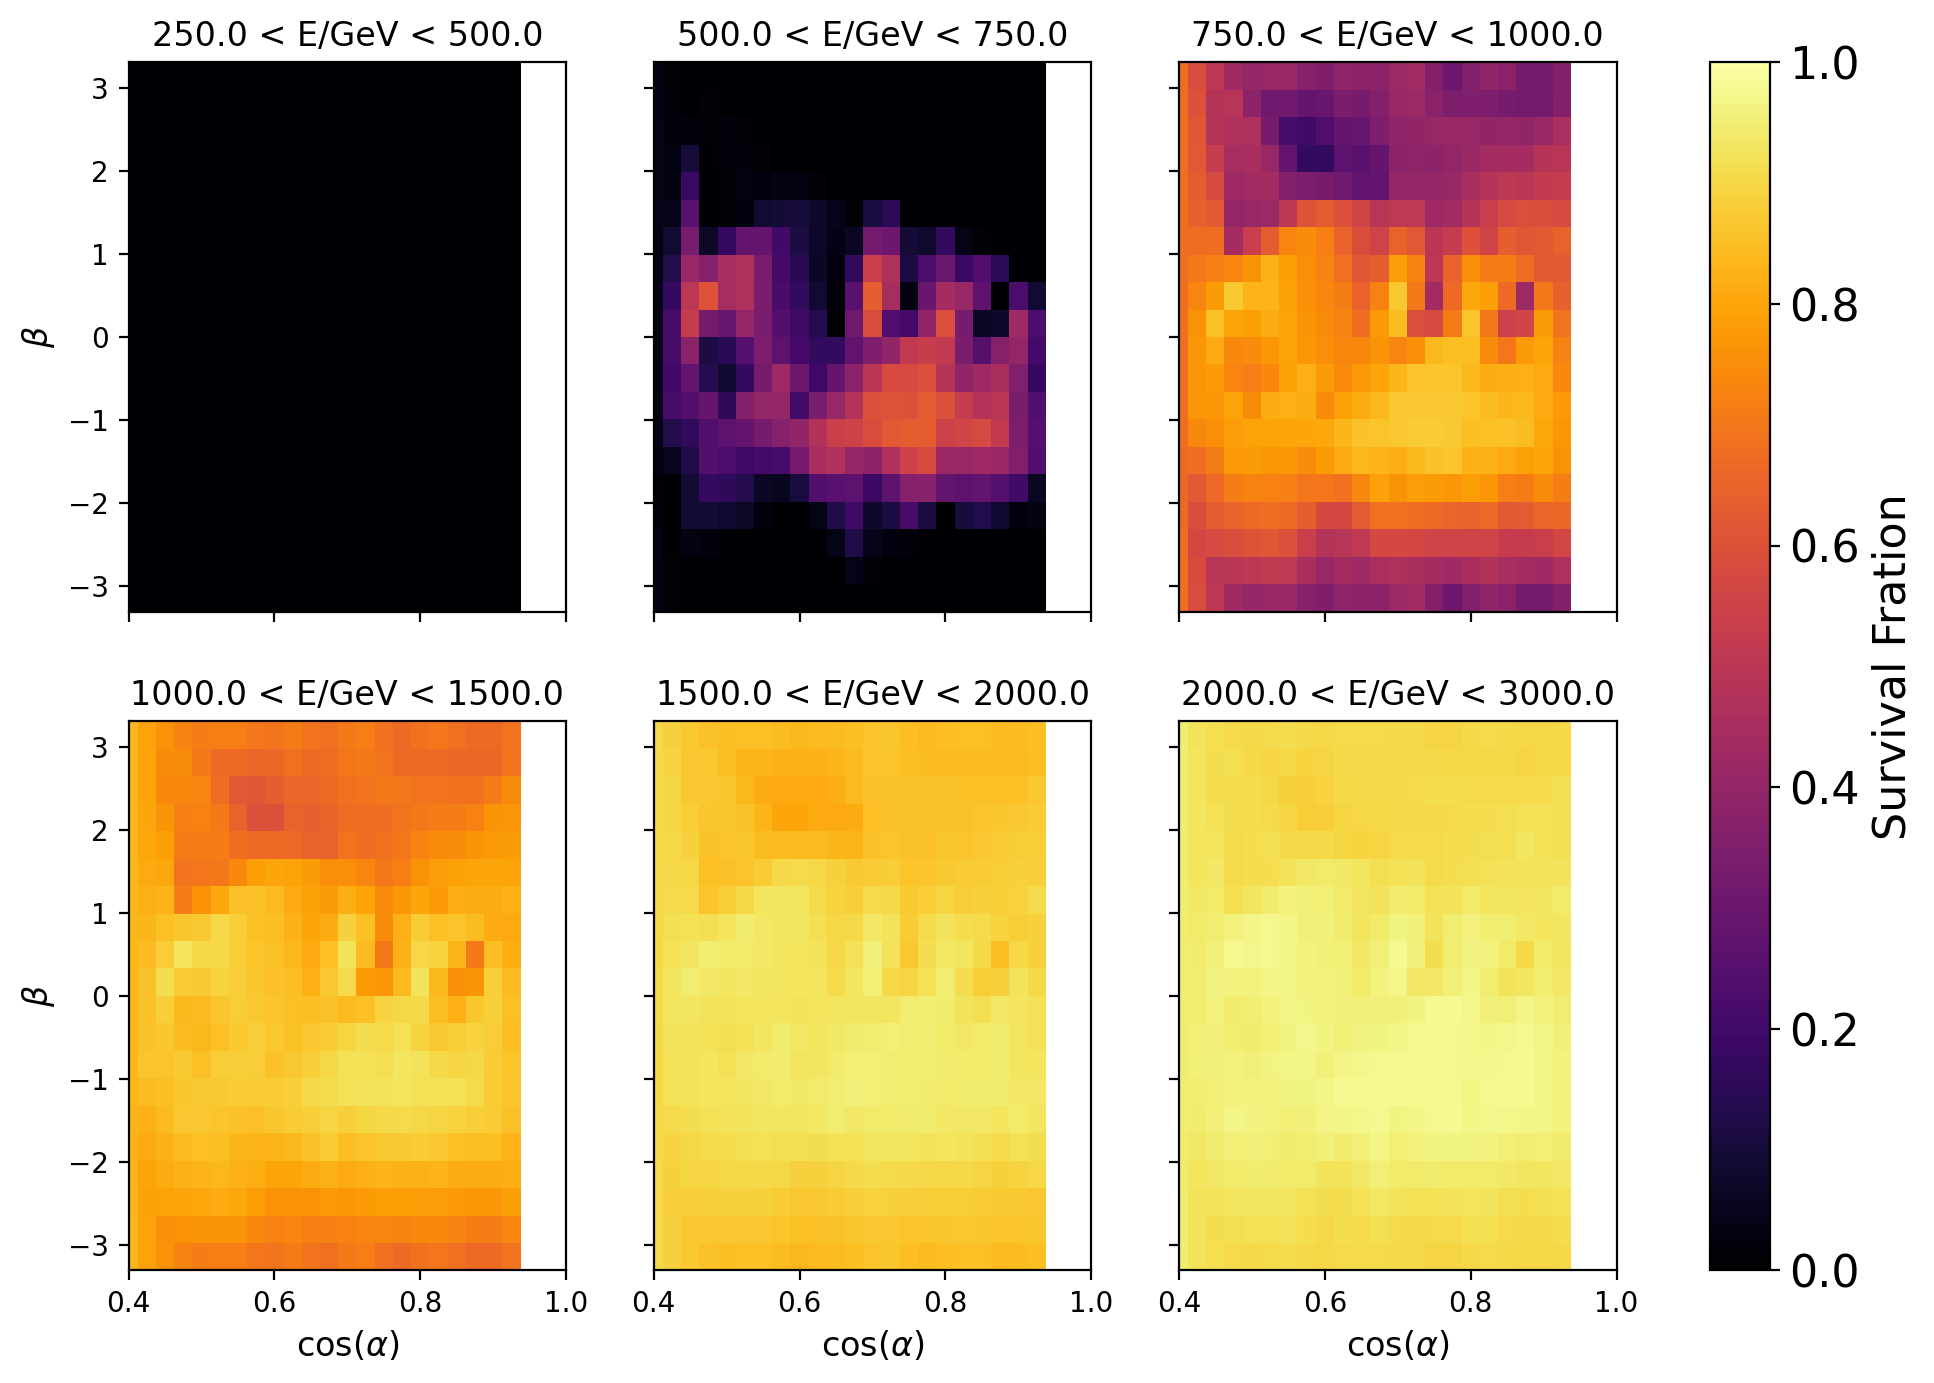

In [225]:
startn=1
fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(12,8),dpi=200, sharex=True, sharey=True)
for iax in range(0,len(axes.flat)):
    ax=axes.flatten()[iax]
    im=ax.pcolormesh(cosas,bs,np.transpose(survivalfractions[iax+startn]),cmap='inferno',shading='auto',vmin=0,vmax=1)
    ax.set_title(str(EBins[iax+startn])+ " < E/GeV < " + str(EBins[iax+startn+1]))
    ax.set_xlim(0.4,1)
cbar=fig.colorbar(im, ax=axes.ravel().tolist())
cbar.set_label('Survival Fration',fontsize=16)
cbar.ax.tick_params(labelsize=16)
totalflux=np.zeros_like(correctedmeshes[0])

axes[1,0].set_xlabel(r"cos($\alpha$)",fontsize=12)
axes[1,1].set_xlabel(r"cos($\alpha$)",fontsize=12)
axes[1,2].set_xlabel(r"cos($\alpha$)",fontsize=12)

axes[1,0].set_ylabel(r"$\beta$",fontsize=12)
axes[0,0].set_ylabel(r"$\beta$",fontsize=12)



Text(0, 0.5, '$\\beta$')

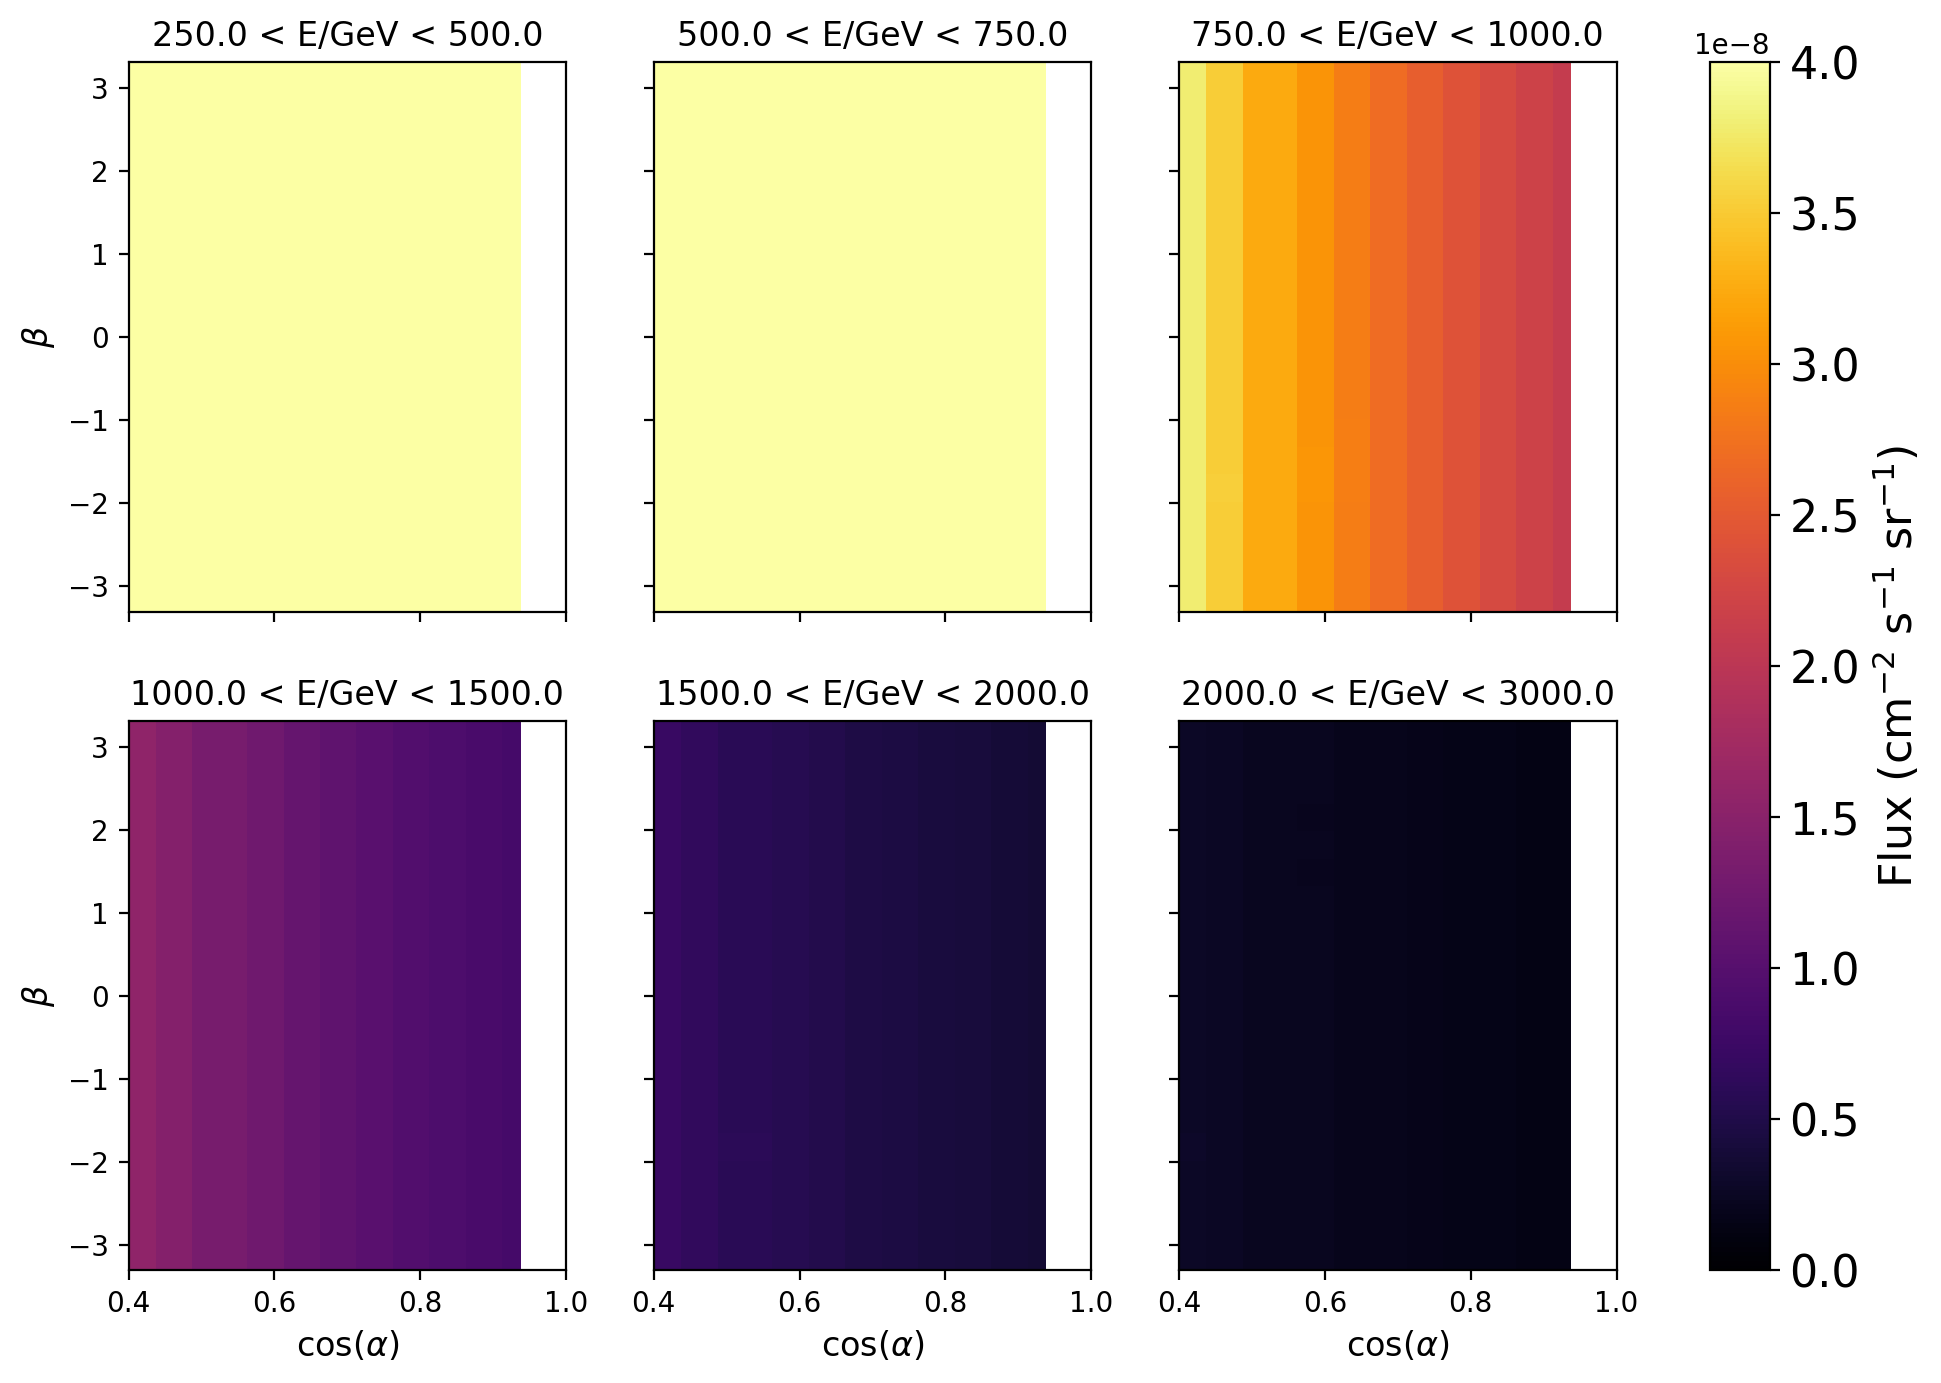

In [226]:
startn=1
fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(12,8),dpi=200, sharex=True, sharey=True)
for iax in range(0,len(axes.flat)):
    ax=axes.flatten()[iax]
    im=ax.pcolormesh(cosas,bs,np.transpose(FluxMeshes[iax+startn]),cmap='inferno',shading='auto',vmin=0,vmax=4e-8)
    ax.set_title(str(EBins[iax+startn])+ " < E/GeV < " + str(EBins[iax+startn+1]))
    ax.set_xlim(0.4,1)
cbar=fig.colorbar(im, ax=axes.ravel().tolist(),label='Flux (cm$^{-2}$ s$^{-1}$ sr$^{-1}$)')
cbar.set_label('Flux (cm$^{-2}$ s$^{-1}$ sr$^{-1}$)',fontsize=16)
cbar.ax.tick_params(labelsize=16)
totalflux=np.zeros_like(FluxMeshes[0])

axes[1,0].set_xlabel(r"cos($\alpha$)",fontsize=12)
axes[1,1].set_xlabel(r"cos($\alpha$)",fontsize=12)
axes[1,2].set_xlabel(r"cos($\alpha$)",fontsize=12)

axes[1,0].set_ylabel(r"$\beta$",fontsize=12)
axes[0,0].set_ylabel(r"$\beta$",fontsize=12)

